In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [207]:
pip install plotly==4.5.4

     |████████████████████████████████| 7.1 MB 964 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=65c961bf4e08ea9ab3aeeae3aa17593e1cf177e12093946131e83f79d8d5446e
  Stored in directory: /Users/soulemanecheckmouhammad/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [102]:
database = pd.read_csv("/Users/soulemanecheckmouhammad/Mes Documents/JEDHA/PROJET /SPEED DATING/speed-dating-experiment/Speed Dating Data.csv", encoding = "ISO-8859-1")

In [103]:
database.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [104]:
# Dans un premier temps retirer les colonnes inutiles
database.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [106]:
count = database.isna().sum()


In [107]:
database.shape

(8378, 195)

Text(0, 0.5, 'Frequency')

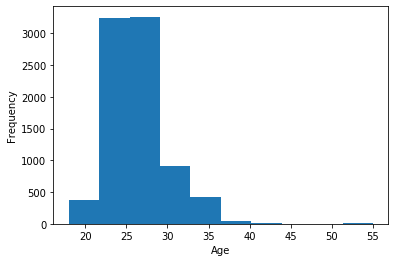

In [108]:
age = database[np.isfinite(database['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

> Nous pouvons observer que la majorité des candidats ont entre 20 et 30 ans

In [109]:
cols = database.columns
for col in cols:
    mis = database[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/database.shape[0] * 100, 3)))

id: 1 missing, 0.012%
positin1: 1846 missing, 22.034%
pid: 10 missing, 0.119%
int_corr: 158 missing, 1.886%
age_o: 104 missing, 1.241%
race_o: 73 missing, 0.871%
pf_o_att: 89 missing, 1.062%
pf_o_sin: 89 missing, 1.062%
pf_o_int: 89 missing, 1.062%
pf_o_fun: 98 missing, 1.17%
pf_o_amb: 107 missing, 1.277%
pf_o_sha: 129 missing, 1.54%
attr_o: 212 missing, 2.53%
sinc_o: 287 missing, 3.426%
intel_o: 306 missing, 3.652%
fun_o: 360 missing, 4.297%
amb_o: 722 missing, 8.618%
shar_o: 1076 missing, 12.843%
like_o: 250 missing, 2.984%
prob_o: 318 missing, 3.796%
met_o: 385 missing, 4.595%
age: 95 missing, 1.134%
field: 63 missing, 0.752%
field_cd: 82 missing, 0.979%
undergra: 3464 missing, 41.346%
mn_sat: 5245 missing, 62.604%
tuition: 4795 missing, 57.233%
race: 63 missing, 0.752%
imprace: 79 missing, 0.943%
imprelig: 79 missing, 0.943%
from: 79 missing, 0.943%
zipcode: 1064 missing, 12.7%
income: 4099 missing, 48.926%
goal: 79 missing, 0.943%
date: 97 missing, 1.158%
go_out: 79 missing, 0.943

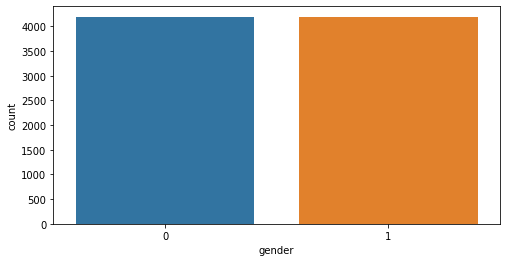

In [110]:
# Simple check to see if the number of men and women are equivalent
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=database)

In [149]:
# Number of people who found a match
match_desc = database.match.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")
second_date = pd.crosstab(index=match_desc,columns="Date")
second_date

col_0,Date
match,
NO,6998
YES,1380


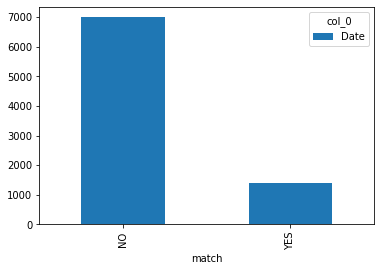

In [150]:
second_date.plot.bar(stacked=True)

In [112]:
 print("{}% of people got a second date".format(round(second_date["count"][1]/second_date["count"][0]* 100, 3)))

19.72% of people got a second date


In [113]:
# Clean the data
to_drop = []
tmp = [col for col in database.columns if '1_s' in col or '3_s' in col] # asked mid session, not clear when so we drop it
to_drop += tmp
tmp = [col for col in database.columns if '_2' in col]  # asked after the session
tmp += ['length']
to_drop += tmp
tmp = [col for col in database.columns if '_3' in col]  # asked after the session
tmp += ['you_call', 'them_cal']
to_drop += tmp

print(f"Original shape: {database.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del database[col]
    
print(f"New shape: {database.shape}")

Original shape: (8378, 195)
Dropping 87 columns
New shape: (8378, 108)


In [114]:
to_drop = ['positin1', 'undergra', 'mn_sat', 'tuition', 'zipcode', 'income', 'expnum', 'match_es']
to_drop += [col for col in database.columns if '5_1' in col or '4_1' in col]  # sadly, not asked to everyone

print(f"Original shape: {database.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del database[col]
    
print(f"New shape: {database.shape}")

Original shape: (8378, 108)
Dropping 19 columns
New shape: (8378, 89)


In [115]:
print('Unique id\'s in original dataframe: {}'.format(len(database.iid.unique())))
df_full = database[database.pid.notnull()].copy()  # dropping the missing female's dates.
print('Shape original dataframe: {}'.format(database.shape))
personal = ['gender', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 
       'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy']
personal += [col for col in database.columns if '1_1' in col]
print('_'*40)
print('_'*40)

participant = database[['iid', 'wave'] + personal].drop_duplicates().copy()
print('Unique id\'s in participants\' dataframe: {}'.format(len(participant.iid.unique())))
print('Shape participants\' dataframe: {}'.format(participant.shape))
print('_'*40)
print('Missing values about participants:')
cols = participant.columns
for col in cols:
    mis = participant[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/participant.shape[0] * 100, 3)))
print('_'*40)
print('_'*40)

personal_o = ['age_o','race_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
partner = database[['pid', 'wave'] + personal_o].drop_duplicates().copy()
print('Unique id\'s in partners\' dataframe: {}'.format(len(partner.pid.unique())))
print('Shape partners\' dataframe: {}'.format(partner.shape))
print('_'*40)
print('Missing values about partners:')
cols = partner.columns
for col in cols:
    mis = partner[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/partner.shape[0] * 100, 3)))

Unique id's in original dataframe: 551
Shape original dataframe: (8378, 89)
________________________________________
________________________________________
Unique id's in participants' dataframe: 551
Shape participants' dataframe: (551, 38)
________________________________________
Missing values about participants:
age: 8 missing, 1.452%
field: 6 missing, 1.089%
field_cd: 7 missing, 1.27%
race: 6 missing, 1.089%
imprace: 7 missing, 1.27%
imprelig: 7 missing, 1.27%
goal: 7 missing, 1.27%
date: 8 missing, 1.452%
go_out: 7 missing, 1.27%
career: 8 missing, 1.452%
career_c: 12 missing, 2.178%
sports: 7 missing, 1.27%
tvsports: 7 missing, 1.27%
exercise: 7 missing, 1.27%
dining: 7 missing, 1.27%
museums: 7 missing, 1.27%
art: 7 missing, 1.27%
hiking: 7 missing, 1.27%
gaming: 7 missing, 1.27%
clubbing: 7 missing, 1.27%
reading: 7 missing, 1.27%
tv: 7 missing, 1.27%
theater: 7 missing, 1.27%
movies: 7 missing, 1.27%
concerts: 7 missing, 1.27%
music: 7 missing, 1.27%
shopping: 7 missing, 1.2

In [116]:
col_to_filt = ['age', 'race']
mis_id = []

for col in col_to_filt:
    mis_id = list(set(mis_id + list(participant[participant[col].isna()].iid.values)))
    mis_id = list(set(mis_id + list(partner[partner[col + '_o'].isna()].pid.values)))

print(f'Original number of participants: {participant.shape[0]}')

mis_id += [28] # another respondent with a lot of missing values
participant = participant[~participant.iid.isin(mis_id)]
partner = partner[~partner.pid.isin(mis_id)]

print(f"Dropping {len(mis_id)} participants")
print(f"New number of participants: {participant.shape[0]}")

Original number of participants: 551
Dropping 11 participants
New number of participants: 542


In [117]:
partner.head()

,pid,wave,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
0,11.0,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0
1,12.0,1,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0
2,13.0,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0
3,14.0,1,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0
4,15.0,1,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0


In [118]:
print(f'Original shape of the dataframe: {df_full.shape}')
df_clean = database[~(database.iid.isin(mis_id) | database.pid.isin(mis_id))].copy()
del df_clean['id']  # not useful
del df_clean['field']  # redundant with field_cd
del df_clean['career']
del df_clean['career_c']  # both not explored and I am lazy
del df_clean['from']
del df_clean['partner']  # this is an id, never train on those

print(f'Shape of the cleaned data: {df_clean.shape}')

Original shape of the dataframe: (8368, 89)
Shape of the cleaned data: (8148, 83)


In [119]:
df_clean.loc[df_clean.field_cd.isna(), 'field_cd'] = 'Oth.'  # easy cleaning

In [120]:
df_clean.loc[df_clean.met.isna(), 'met'] = 0
df_clean.loc[df_clean.met_o.isna(), 'met_o'] = 0

df_clean.loc[df_clean.met < 2, 'met'] = 0
df_clean.loc[df_clean.met_o < 2, 'met_o'] = 0
df_clean.loc[df_clean.met > 1, 'met'] = 1
df_clean.loc[df_clean.met_o > 1, 'met_o'] = 1

df_clean.loc[df_clean.gaming > 10, 'gaming'] = 10
df_clean.loc[df_clean.reading > 10, 'reading'] = 10

In [121]:
cols = df_clean.columns
for col in cols:
    mis = df_clean[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/database.shape[0] * 100, 3)))

pf_o_fun: 9 missing, 0.107%
pf_o_amb: 9 missing, 0.107%
pf_o_sha: 31 missing, 0.37%
attr_o: 178 missing, 2.125%
sinc_o: 249 missing, 2.972%
intel_o: 270 missing, 3.223%
fun_o: 323 missing, 3.855%
amb_o: 681 missing, 8.128%
shar_o: 1034 missing, 12.342%
like_o: 215 missing, 2.566%
prob_o: 281 missing, 3.354%
date: 18 missing, 0.215%
fun1_1: 9 missing, 0.107%
amb1_1: 9 missing, 0.107%
shar1_1: 31 missing, 0.37%
amb2_1: 9 missing, 0.107%
shar2_1: 9 missing, 0.107%
attr3_1: 26 missing, 0.31%
sinc3_1: 26 missing, 0.31%
fun3_1: 26 missing, 0.31%
intel3_1: 26 missing, 0.31%
amb3_1: 26 missing, 0.31%
attr: 178 missing, 2.125%
sinc: 249 missing, 2.972%
intel: 270 missing, 3.223%
fun: 323 missing, 3.855%
amb: 681 missing, 8.128%
shar: 1034 missing, 12.342%
like: 215 missing, 2.566%
prob: 281 missing, 3.354%


In [122]:
round_second = df_clean.match.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")

matches2 = round_second.value_counts()
matches2

NO     6806
YES    1342
Name: match, dtype: int64

In [123]:
diff_gender = df_clean.gender.apply(lambda x: 
                                       "Female" if x==0 
                                       else "Male"
                                   )
                                      

gender = diff_gender.value_counts()
gender

Male      4074
Female    4074
Name: gender, dtype: int64

In [124]:
df_clean.columns

Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig',
       'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

In [125]:
is_man = df_clean["gender"]==1
df_man = df_clean[is_man]
df_man.head()

,iid,gender,idg,condtn,wave,round,position,order,pid,match,...,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
100,11,1,2,1,1,10,7,4,1.0,0,...,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,1.0
101,11,1,2,1,1,10,3,10,2.0,0,...,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,1.0
102,11,1,2,1,1,10,9,6,3.0,0,...,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,0.0
103,11,1,2,1,1,10,6,3,4.0,0,...,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,1.0
104,11,1,2,1,1,10,4,1,5.0,0,...,0,6.0,8.0,8.0,8.0,7.0,6.0,6.0,5.0,1.0


In [126]:
round_second = df_man.dec.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")

matches = round_second.value_counts()


like = df_woman.dec.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")

likes = like.value_counts()


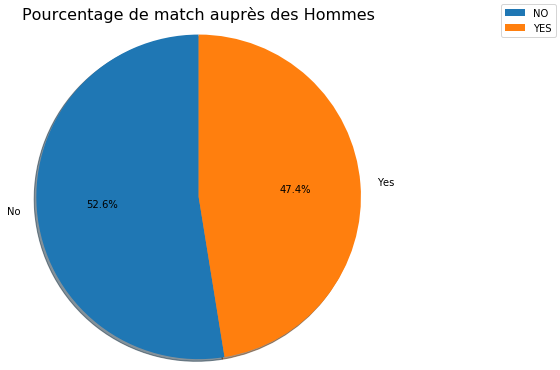

In [127]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)

fig.suptitle('Pourcentage de match auprès des Hommes', fontsize=16)

ax.pie(matches, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1.5,
       labels = ["No", "Yes"]
       )

fig.legend(matches.index)

plt.show()


In [128]:
is_woman = df_clean["gender"]==0
df_woman = df_clean[is_woman]
df_woman.head()

,iid,gender,idg,condtn,wave,round,position,order,pid,match,...,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,1,0,1,1,1,10,7,4,11.0,0,...,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,1.0
1,1,0,1,1,1,10,7,3,12.0,0,...,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,0.0
2,1,0,1,1,1,10,7,10,13.0,1,...,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,0.0
3,1,0,1,1,1,10,7,5,14.0,1,...,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,1.0
4,1,0,1,1,1,10,7,7,15.0,1,...,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,1.0


/Users/soulemanecheckmouhammad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



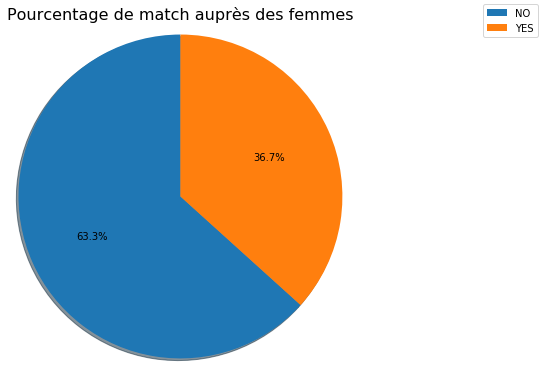

In [129]:
fig1, ax1 = plt.subplots(figsize=(10,5), constrained_layout=True)

fig1.suptitle('Pourcentage de match auprès des femmes', fontsize=16)
ax1.pie(likes, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1.5,
       )

fig1.legend(likes.index, loc="best")


plt.show()

In [33]:
races = df_clean.race.apply(lambda x: 
                                 "African American" if x==1.0
                                 else "European" if x==2.0
                                 else "Latino" if x==3.0
                                 else "Asian" if x==4.0
                                 else "Native American" if x==5.0
                                 else "Other")

count_races = races.value_counts()
count_races


European            4612
Asian               1955
Latino               655
Other                514
African American     412
Name: race, dtype: int64

In [130]:
df_clean.race = df_clean.race.astype(int)


In [131]:
s = df_clean.shape[0]
print(s)

8148


<BarContainer object of 5 artists>

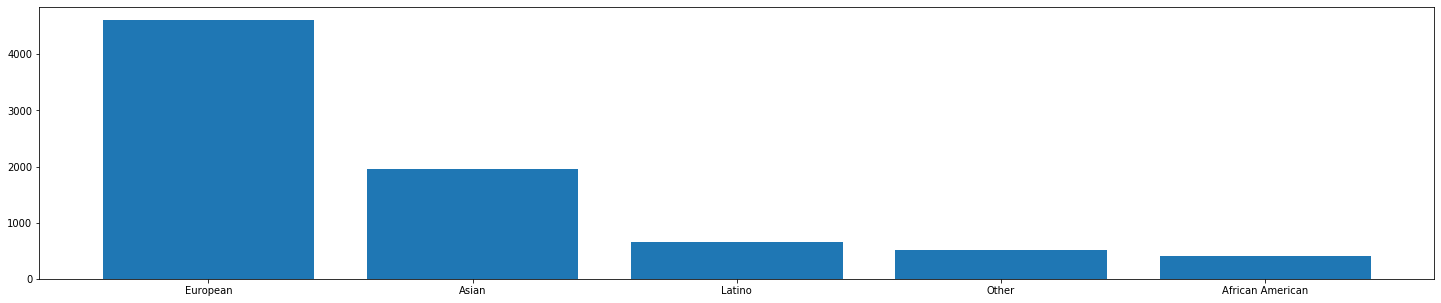

In [132]:
plt.figure(figsize=(25,5))
plt.bar(count_races.index, count_races.values)


In [133]:
# Almost the same number of men and women, ok
# Lets start understanding what people look for in a partner; men vs women
atributes_gender = df_clean[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

atributes_gender


,Attractive,Sincere,Intelligente,Fun,Ambituous,Shared Interests
gender,,,,,,
0,18.046097,18.292872,21.021433,17.112072,12.871696,12.697757
1,26.830012,16.496132,19.543981,17.740030,8.567491,11.018627


In [134]:
trace1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

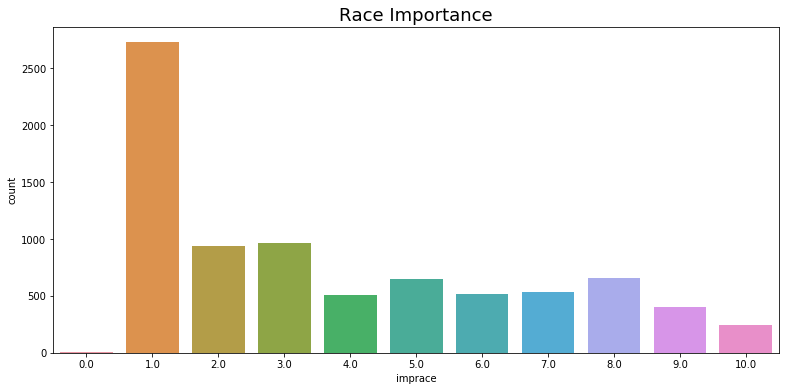

In [135]:
plt.figure(figsize=(13,6))
plt.title('Race Importance', fontsize=18)
sns.countplot(df_clean['imprace'])

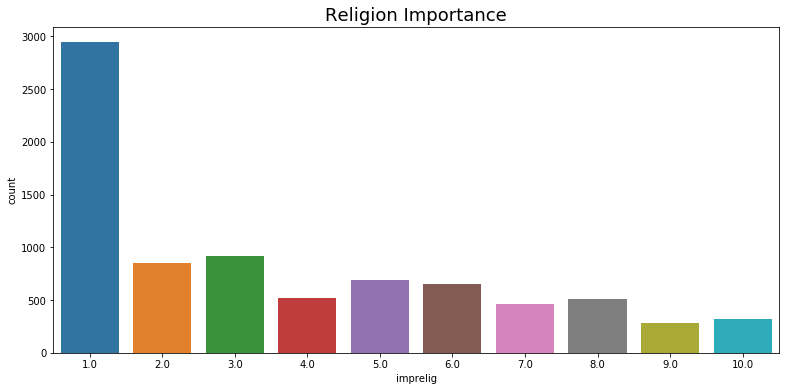

In [136]:
plt.figure(figsize=(13,6))
plt.title('Religion Importance', fontsize=18)
sns.countplot(df_clean['imprelig'])

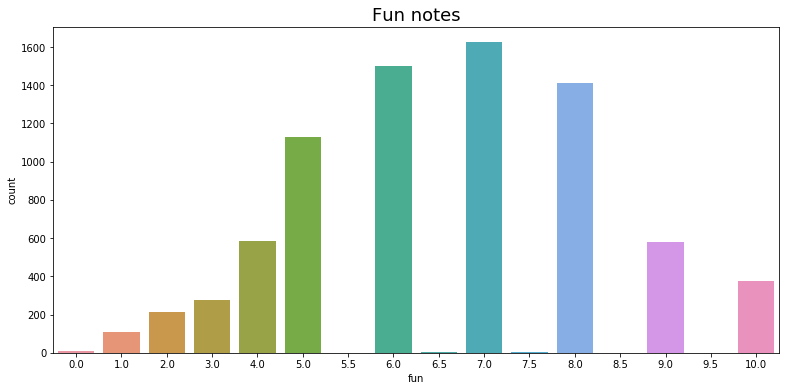

In [151]:
plt.figure(figsize=(13,6))
plt.title('Fun notes', fontsize=18)
sns.countplot(df_clean['fun'])

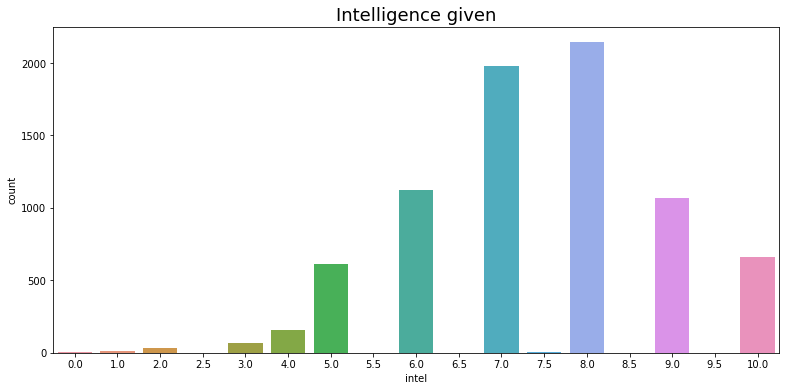

In [152]:
plt.figure(figsize=(13,6))
plt.title('Intelligence given', fontsize=18)
sns.countplot(df_clean['intel'])

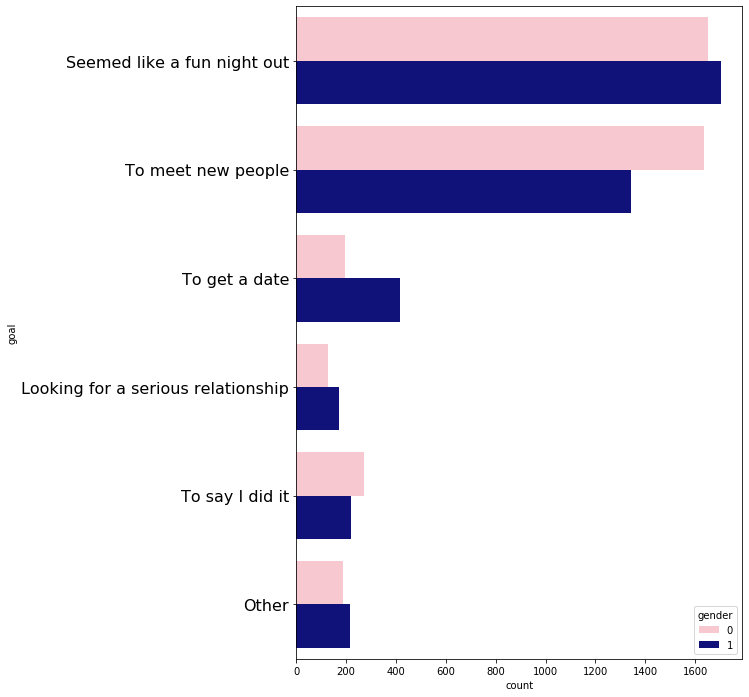

In [99]:
# Goal Men vs Women
goals = ['Seemed like a fun night out','To meet new people','To get a date'
        ,'Looking for a serious relationship','To say I did it','Other']
plt.figure(figsize=(8,12))
sn = sns.countplot(y='goal',data=df_clean, hue='gender', palette=['pink','darkblue'])
sn.set(yticklabels=goals)
sn.set
sn = plt.yticks(rotation=0,fontsize=16)